In [1]:
from qiskit import *  

In [2]:
qiskit.__qiskit_version__

C:\Users\Melissa\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.1', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.4', 'qiskit': '0.29.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit.circuit import Parameter 

In [4]:
qr = QuantumRegister(2)

In [5]:
cr = ClassicalRegister(2)

In [6]:
circuit = QuantumCircuit(qr,cr)

In [7]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

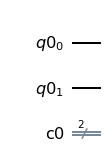

In [8]:
circuit.draw(output='mpl') 

In [9]:
parameter_theta = Parameter('θ')
parameter_phi = Parameter('ϕ')
n = 4
for i in range(n):
    circuit.rz(parameter_theta, qubit=0)
    circuit.rz(parameter_theta, qubit=1)
    circuit.rxx(parameter_phi,qubit1=0,qubit2=1)


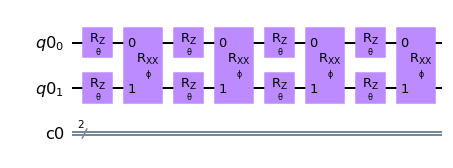

In [10]:
circuit.draw(output ='mpl')

In [11]:
print(circuit.parameters)

ParameterView([Parameter(θ), Parameter(ϕ)])


ParameterView([Parameter(θ), Parameter(ϕ)])


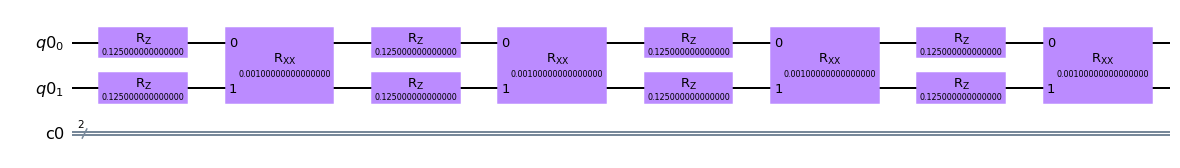

In [40]:
#param_dict = {Parameter('θ'): 3.1416/4, Parameter('ϕ'):0.1}
#print(param_dict)
print(circuit.parameters)
bound_circuit = circuit.bind_parameters({1/1000, 1/8})
bound_circuit.draw('mpl')

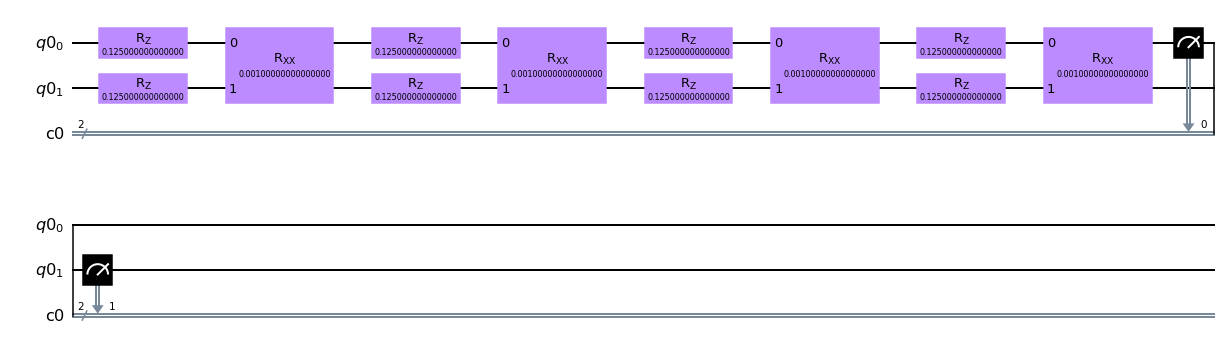

In [41]:
bound_circuit.measure(0,0)
bound_circuit.measure(1,1)
bound_circuit.draw('mpl')

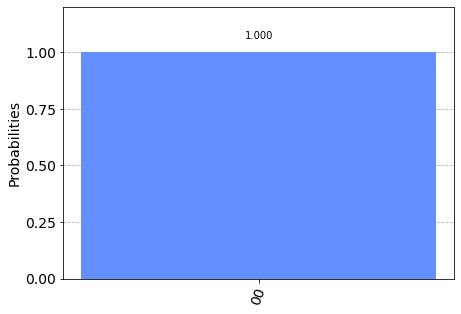

In [42]:
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(bound_circuit).result()
counts = result.get_counts(bound_circuit)
plot_histogram(counts)


In [43]:
from qiskit.tools.visualization import plot_state_paulivec
backend = BasicAer.get_backend('statevector_simulator')
result = backend.run(transpile(bound_circuit, backend)).result()
psi  = result.get_statevector(bound_circuit)

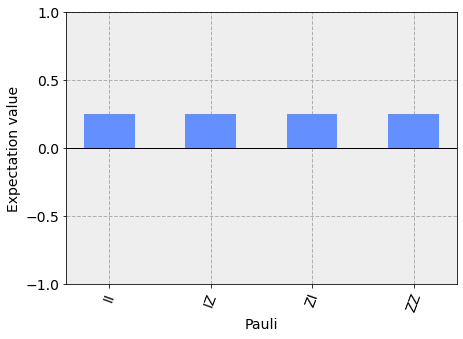

In [44]:
plot_state_paulivec(psi)

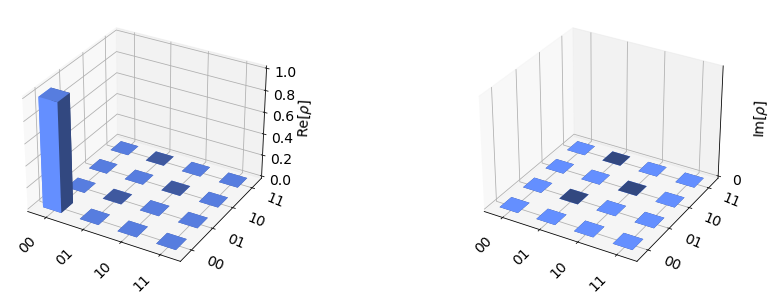

In [45]:
from qiskit.tools.visualization import plot_state_city
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(bound_circuit).result()
statevector = result.get_statevector(bound_circuit)
plot_state_city(statevector)

C:\Users\Melissa\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


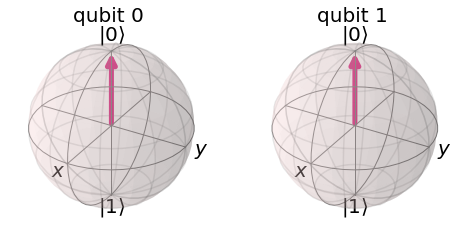

In [20]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(psi)

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter


In [13]:
def createCircuit(n=4, theta=3.1416/4, phi=1):
    qr = QuantumRegister(2)
    cr = ClassicalRegister(2)
    circuit = QuantumCircuit(qr,cr)
    parameter_theta = Parameter('θ')
    parameter_phi = Parameter('ϕ')
    for i in range(n):
        circuit.rz(parameter_theta, qubit=0)
        circuit.rz(parameter_theta, qubit=1)
        circuit.rxx(parameter_phi,qubit1=0,qubit2=1)
    return circuit

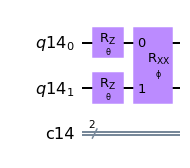

In [23]:
b_c = createCircuit(1)
b_c.draw('mpl')

In [47]:
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
simulator = Aer.get_backend('aer_simulator')


circuits = []
bounded_circuits = []
for i in range(1,4):
    circuits.append(createCircuit(i))
    bounded_circuits.append(circuits[i-1].bind_parameters({3.1416/16, 1}))

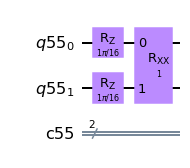

In [48]:
bounded_circuits[0].draw('mpl')

In [58]:
from qiskit.tools.visualization import plot_histogram

simulator = Aer.get_backend('aer_simulator')
counts = []
for c in bounded_circuits:
    result = simulator.run(c).result()
    counts.append(result.get_counts(c))

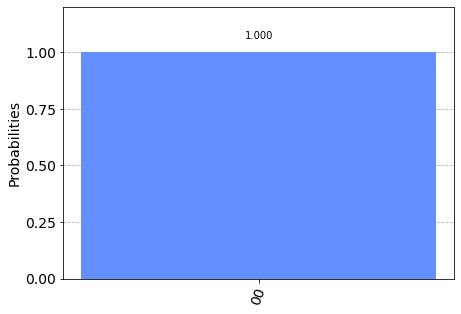

In [59]:
plot_histogram(counts[0])

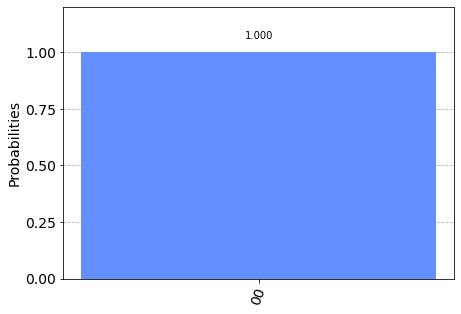

In [60]:
plot_histogram(counts[1])

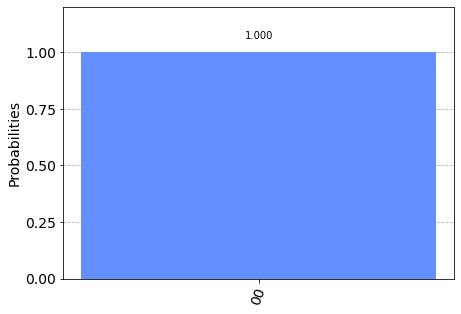

In [61]:
plot_histogram(counts[2])